In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df =pd.read_csv("housing.csv")
print(df.head())
print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [9]:
df = pd.get_dummies(df, drop_first=True)  # one-hot encoding


In [10]:
x = df.drop("price", axis=1) # features 
y = df ["price"]  # target

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)   

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 970043.403920164
MSE: 1754318687330.6643
R² Score: 0.6529242642153184


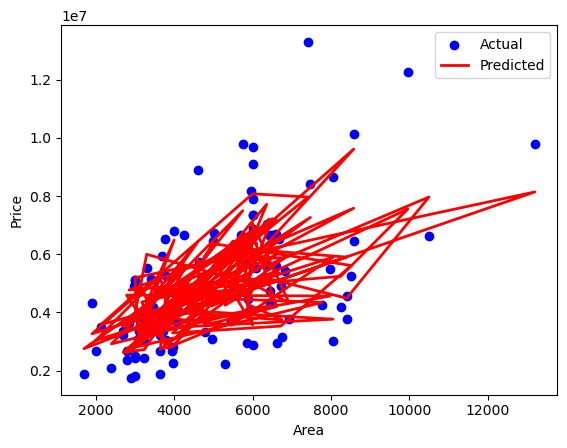

In [20]:
plt.scatter(x_test["area"], y_test, color="blue", label="Actual")
plt.plot(x_test["area"], y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()


In [21]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 260032.35760741401
Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
